# 3次元曲面上の物体の重力運動

運動方程式

$$\boldsymbol{F} = m \boldsymbol{a} \qquad (m = {\rm const.})$$

より

$$
\boldsymbol{a}
\propto \boldsymbol{F}
\propto \cfrac{\partial z}{\partial \boldsymbol{x}}
= \left(
\cfrac{\partial z}{\partial x},
\cfrac{\partial z}{\partial y}
\right)
$$

よって速度の漸化式は

$$
\boldsymbol{v} \longleftarrow \boldsymbol{v} - c_v \cfrac{\partial z}{\partial \boldsymbol{x}} \qquad (c_v = {\rm const.})
$$

位置の漸化式は

$$
\boldsymbol{x} \longleftarrow \boldsymbol{x} + c_x \boldsymbol{v} \qquad (c_x = {\rm const.})$$

<IPython.core.display.Javascript object>


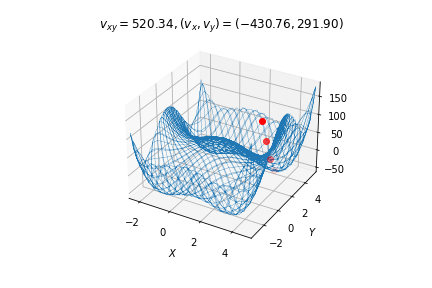

In [24]:
import numpy as np

%matplotlib inline
%matplotlib nbagg

from matplotlib import pyplot as plt
#from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
#from IPython.display import HTML


a, b, c = 1.0, 1.0, -2.0
cx, cv = 0.001, 1.0
T = 2000

def get_z(x, y):
    """
    曲面の方程式
    """
    #return (x-a)**2 + (y-b)**2 + c
    return (x-a)*(x-a)*(x-a-3)*(x-a+3) + (y-b+2)*(y-b-2)*(y-b+4)*(y-b-4) + c

def get_grad(x, y):
    #return 2*(x-a), 2*(y-b)
    return 2*(x-a)*(2*(x-a)**2-9) - 9, 4*(y-b)*((y-b)**2-10)

# 初期値
x, y = [5.0], [5.5]
#x, y = [8.0], [7.0]
z = [get_z(x[-1], y[-1])]
vx, vy = [3.2], [2.7]
vx, vy = [0], [0]

for t in range(T):
    g = get_grad(x[-1], y[-1])
    vx.append(vx[-1]-cv*g[0])
    vy.append(vy[-1]-cv*g[1])
    x.append(x[-1]+vx[-1]*cx)
    y.append(y[-1]+vy[-1]*cx)
    z.append(get_z(x[-1], y[-1]))



# 結果のプロット
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set(xlim=(np.min(x),np.max(x)),ylim=(np.min(y),np.max(y)),zlim=(np.min(z),np.max(z)))
plt.xlabel('$X$')
plt.ylabel('$Y$')

## 平面
"""
N_mesh = 100
XX, YY = np.meshgrid(np.linspace(np.min(x),np.max(x),N_mesh), np.linspace(np.min(y),np.max(y),N_mesh))
print(XX.shape)
plt.plot(XX.flatten(), YY.flatten(), get_z(XX, YY).flatten(), c='orange', alpha=0.2)
"""

p0, = ax.plot(x, y, z, linewidth=0.3)  # 軌跡
p1, = ax.plot([], [], [], 'o', color='r')
p2, = ax.plot([], [], [], 'o', color='r')
p3, = ax.plot([], [], [], 'o', color='r')
p4, = ax.plot([], [], [], 'o', color='r')

x = np.array(x)
y = np.array(y)
z = np.array(z)

def init():
    return p0, p1, p2, p3, p4

def update(i):
    p1.set_data((x[i+3], y[i+3]))
    p1.set_3d_properties(z[i+3])
    p2.set_data((x[i+2], y[i+2]))
    p2.set_3d_properties(z[i+2])
    p2.set_alpha(0.7)
    p3.set_data((x[i+1], y[i+1]))
    p3.set_3d_properties(z[i+1])
    p3.set_alpha(0.4)
    p4.set_data((x[i], y[i]))
    p4.set_3d_properties(z[i])
    p4.set_alpha(0.1)
    plt.title('$v_{{xy}} = {:.2f}, (v_x, v_y) = ({:.2f}, {:.2f})$'.format(np.sqrt(vx[i+3]**2+vy[i+3]**2), vx[i+3], vy[i+3]))
    return p0, p1, p2, p3, p4

ani = animation.FuncAnimation(fig, update, T-3, interval=100)
#ani.save('test.mp4', writer='Pillow')
#HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())
#plt.show()